# 2.0 Example - Using the Experiment Class to Bulk Process XAS Data 

    In this example XAS data will be read into the Experiment Class object and bulk processed.

### Processing will: 
    1. Calculate μx
    2. Energy Calibrate using Reference Channel
    
### Steps:
    
    1. Import Modules
    2. Define Paths
    3. Define Beamline Data Structure
    4. Add Data to Experiment Object
    5. Clean up Data
    6. Calculate Absorption Spectra
    7. Calibrate Energy and Find E0
    8. Save Experiment with 'pickle'
    

### Things to have ready when attemtping this example:

    1. Directoty containing only XAS spectra
    2. Data structure of the XAS files
    3. Directory and filename where to save the experiment object (pickling)


## Step 1. Import Modules

In [1]:
# File Handling
import os
import pickle

# Wrapper for xraylarch (larch)
os.chdir('..')
pwd = os.getcwd()
os.chdir('./catxas')
import general as fcts
import xas as xfcts
import plot as pfcts
import process
import experiment as exp

No conda env active, defaulting to base


## Step 2. Define Paths

#### Modify:
    1. data_dir - directory containing XAS spetra ONLY!
    2. scan_name - a name of one fo the spectra in the experiment, used for interrogation throughout
    3. pickle_dir - directory where to save the experiment
    4. pickpe_name - filename to save the experiment (must include extension '.pickle')


In [2]:
# Folder containing ONLY XAS spectra
data_dir = os.path.join(pwd, 'sample data\Raw Data')

# Scan naame of one of the XAS spectra - used for inspection of the experiment groups
scan_name = '20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0001'

# Directory where to save the experiment:
pickle_dir = os.path.join(pwd, 'sample results')

# File name to save the sxperiment (must include extension '.pickle')
pickle_name = 'SnO2_TPR.pickle'

## Step 3. Define Beamline Data Structure

Common data formats for SSRL beamlines can be found in the "BL specific XAS data structures.ipynb" notebook.

In [3]:
### Define the layout of the xas data file and how spectra are calcualted
xas_data_structure = {
    'time stamp': True,
    'time on line': 5,
    'time format': '# This Scan Create Date:\t%m/%d/%Y %I:%M:%S %p ',
    'padded scan numbers': True,
    'column names': ['Encoder', 'Energy', 'ADC_01', 'ADC_02', 'ADC_03', 'ADC_04', 'ADC_05', 'ADC_06', 'ADC_07', 'ADC_08'],
    'energy column' : 'Energy', # Energy [eV]
    'sample numerator': 'ADC_01', # I0
    'sample denominator': 'ADC_02', # I1
    'sample ln': True,
    'sample invert': False,
    'reference numerator': 'ADC_02', # I1
    'reference denominator': 'ADC_03', # I2
    'reference ln': True,
    'reference invert': False,
    'is QEXAFS': False
}

## Step 4. Add Data to Experiment Object

    The Experiment class is a dictionary-like obect that is used to store XAS data, process data streams, and correlation and fitting results.
    
### Major steps for adding data to the Experiment class:
    a. Create Experiment Class
    b. Load XAS data into the Experiment object
    

### 4a. Create Experiment Class

#### MODIFY:
    1. exp_name - unique identifier for the experiment object

In [4]:
# Uniquie name for the experiment
exp_name = 'SnO2_H2Reduction'

# Create the Experimental Class
my_exp = exp.Experiment(exp_name)



#### Inspection tool to show contents of the Experiment object

In [5]:
# View keys created inside it
print('keys in the experiment object:')
for key in my_exp.__dict__.keys():
    print(f'\t{key} - {type(my_exp.__dict__[key])}')

keys in the experiment object:
	name - <class 'str'>
	process_params - <class 'dict'>
	spectra - <class 'dict'>
	analysis - <class 'dict'>
	summary - <class 'dict'>


### 4b. Load XAS data into the Experiment object

In [6]:
# Add raw data into spectra files
my_exp.import_spectra_data(data_dir, xas_data_structure, print_name = False)

#### Inspection tools to show what and where things are stored in the experiment object
    1. experiment.spectra = dictionary of spectra dictionaries for each spectrum uploaded
    2. experiment.spectra[key] = spectrum dictionary containing details to the X-ray data uploaded
        a. XAS Data Structure is preserved based upon what was uploaded
        b. BL Data is a larch group containing the extracted data from the spectrum file
        
#### Uncomment out all but first lines to see contents

In [7]:
# 1. Show contents (keys) of experiment.spectra

print('experiment.spectra contains the following keys:')
for key in my_exp.spectra.keys():
    print(f'\t{key}')

experiment.spectra contains the following keys:
	20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0001
	20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0002
	20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0003
	20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0004
	20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0005
	20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0006
	20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0007
	20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0008
	20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0009
	20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0010
	20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0011
	20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0012
	20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0013
	20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0014
	20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0015
	20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0016
	20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0017
	20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0018
	20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0019
	20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0020
	20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0021
	20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0022
	20210

In [8]:
# 2. Show contents (keys) for a spectrum dictionary (scan_name, defined above)

print('experiment.spectra[scan_name] contains the following keys with types:')
for key in my_exp.spectra[scan_name].keys():
    print(f'\t{key+ ",":20} type: {type(my_exp.spectra[scan_name][key])}')

experiment.spectra[scan_name] contains the following keys with types:
	XAS Data Structure,  type: <class 'dict'>
	Time,                type: <class 'pandas._libs.tslibs.timestamps.Timestamp'>
	BL Data,             type: <class 'larch.symboltable.Group'>


In [9]:
# 2a. Show contents of the XAS Data Structured within a given spectum dictionary

print("experiment.spectra[scan_name]['XAS Data Structure'] contains the following keys with types:")
for key in my_exp.spectra[scan_name]['XAS Data Structure'].keys():
    print(f'\t{key+ ",":20} Values: {my_exp.spectra[scan_name]["XAS Data Structure"][key]}')

experiment.spectra[scan_name]['XAS Data Structure'] contains the following keys with types:
	time stamp,          Values: True
	time on line,        Values: 5
	time format,         Values: # This Scan Create Date:	%m/%d/%Y %I:%M:%S %p 
	padded scan numbers, Values: True
	column names,        Values: ['Encoder', 'Energy', 'ADC_01', 'ADC_02', 'ADC_03', 'ADC_04', 'ADC_05', 'ADC_06', 'ADC_07', 'ADC_08']
	energy column,       Values: Energy
	sample numerator,    Values: ADC_01
	sample denominator,  Values: ADC_02
	sample ln,           Values: True
	sample invert,       Values: False
	reference numerator, Values: ADC_02
	reference denominator, Values: ADC_03
	reference ln,        Values: True
	reference invert,    Values: False
	is QEXAFS,           Values: False


In [10]:
# 2b. Show contents of the BL Data stored within a given spectum dictionary

my_exp.spectra[scan_name]['BL Data']

Attribute,Type
path,str
filename,str
header,list
data,ndarray
attrs,Group
Encoder,ndarray
Energy,ndarray
ADC_01,ndarray
ADC_02,ndarray
ADC_03,ndarray


## Step 5. Clean up Data

    If spectra were collected using CXAS or QXAS there is a chance that the raw data may need cleaning up to remove duplicate data poins or nan/inf values.
    
#### STILL IN DEVELOPMENT

In [11]:
my_exp.organize_RawData(remove_duplicates=True, remove_nan_inf=False, remove_zeros=False) # remove_nan_inf & remove_zeros does not work yet

Duplicate data points removed
Range of data points per raw spectra: 4980-4980
Range of data points per duplicates removed spectra: 4838-4839


## Step 6. Calculate Absorption Spectra

#### MODIFY:
    1. sample_spectra - True = calcualtes sample mux, False = does not calcualte sample mux
    2. ref_spectra - True = calcualtes reference mux, False = does not calcualte reference mux

In [12]:
# Calcualte mux for Sample:
sample_spectra = True

# Calcualte mux for Reference:
ref_spectra = True

my_exp.calculate_spectra(sample_spectra = sample_spectra, ref_spectra = ref_spectra)

#### Inspection tools to show results of absorption spectra calculation
    1. Spectrum dictionary containing details to the X-ray data uploaded - experiment.spectra[scan_name]
    2. Larch group for a sample spectra - experiment.spectra[scan_name]['Absorption Spectra']['mu sample']
    3. Visuaization of an raw absorption spectrum
        
#### Uncomment out all but first lines to see contents

In [13]:
# 1. Show contents (keys) for a spectrum dictionary (scan_name, defined above)

print('experiment.spectra[scan_name] contains the following keys with types:')
for key in my_exp.spectra[scan_name].keys():
    print(f'\t{key+ ",":20} tyep: {type(my_exp.spectra[scan_name][key])}')

experiment.spectra[scan_name] contains the following keys with types:
	XAS Data Structure,  tyep: <class 'dict'>
	Time,                tyep: <class 'pandas._libs.tslibs.timestamps.Timestamp'>
	BL Data,             tyep: <class 'larch.symboltable.Group'>
	Absorption Spectra,  tyep: <class 'dict'>


In [14]:
# 2. Show contents of 'Absorption Spectra' - 'mu Sample'

my_exp.spectra[scan_name]['Absorption Spectra']['mu Sample']

Attribute,Type
energy,ndarray
mu,ndarray
delE,float


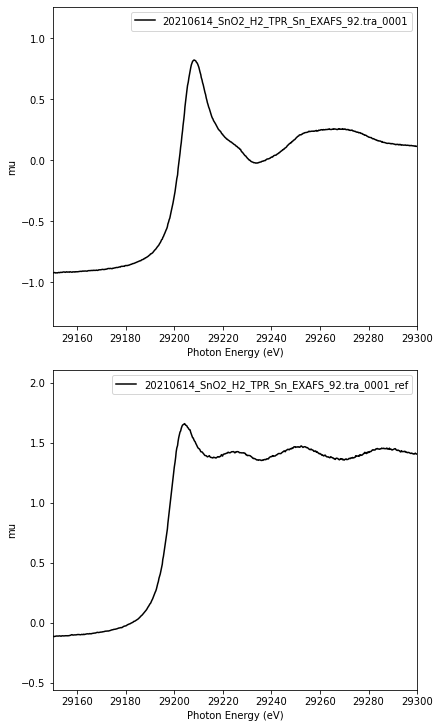

In [15]:
# 3. Visualize absorption spectra of the sample and reference for scan_name.

# MODIFY: emin, emax

emin = 29150
emax = 29300

Samp_group = my_exp.spectra[scan_name]['Absorption Spectra']['mu Sample']
Ref_group = my_exp.spectra[scan_name]['Absorption Spectra']['mu Reference']
 
pfcts.plot_XANES([Samp_group, Ref_group], emin, emax, spectra = 'mu', deriv = False, e0 = None, e0_line = False, overlay = False)

## Step 7. Calibrate Energy and Find E0

    Calibration has 2 steps:
        a. Find the edge of the reference spectra and determine the energy shift (delE)
        b. find the E0 value for the sample spectra

    Calibration shoudl be perfromed with the reference channel if possible.
    Calibration can be skipped, however a second step will be needed to set the E0 value for the appropriate spectra [Commented out in example]

    Calibration will find the first inflection point of the data based upon the range set by the suppled values of Ref_E0 value and energy_range.
        Range = Ref_E0 +/- energy_range

    For the reference and the sample, the use_mean parameter will set each spectrum to the mean E0 value found. This is useful as there is no data smoothing on the reference, and will pick an average value for the sample if it is transient.

### Major steps for adding data to the Experiment class:
    a. Calibrate Reference Spectra
    b. Find Sample E0


### 7a. Calibrate Reference Spectra

#### MODIFY:
    1. Ref_E0 - set to known energy value for the reference channel
    2. energy_range - how far to look around the theiretical edge to find an inflection point
    3. use_mean - True or False, determiend if each spetra has a unique E0 or if it shared

Reference Edge Finding Statistics:
	Reference E0 min:  29197.43 eV
	Reference E0 max:  29200.21 eV
	Reference E0 mean: 29198.84 +/- 0.58 eV
	delE range: -0.21-2.57 eV

Mean E0 Parameters:
	delE mean: 1.16 eV


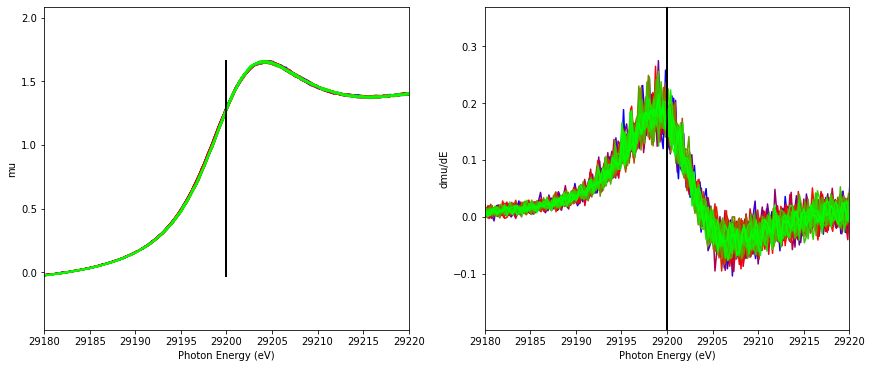

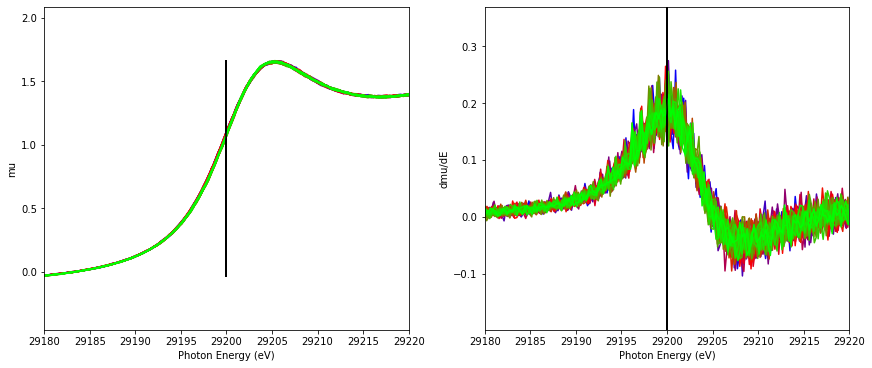

In [16]:
Ref_E0 = 29200
energy_range = 20
use_mean = True

my_exp.calibrate_reference_spectra(Ref_E0, energy_range=20, use_mean = use_mean)

### 7b. Find Sample E0

#### MODIFY:
    1. Samp_e0 - approximate edge position of the sample
    2. energy_range - how far to look around the theiretical edge to find an inflection point
    3. use_mean - True or False, determiend if each spetra has a unique E0 or if it shared

Sample Calibraiton Statistics:
	Sample E0 min: 29198.95 eV
	Sample E0 max: 29205.71 eV
	Sample E0 mean: 29202.65 +/- 2.43 eV


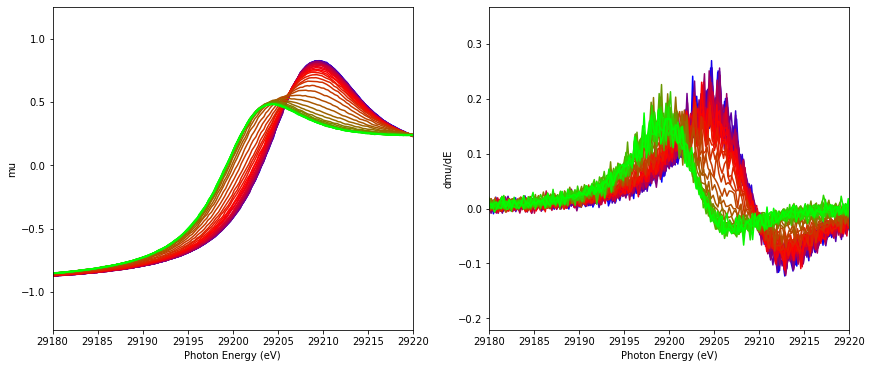

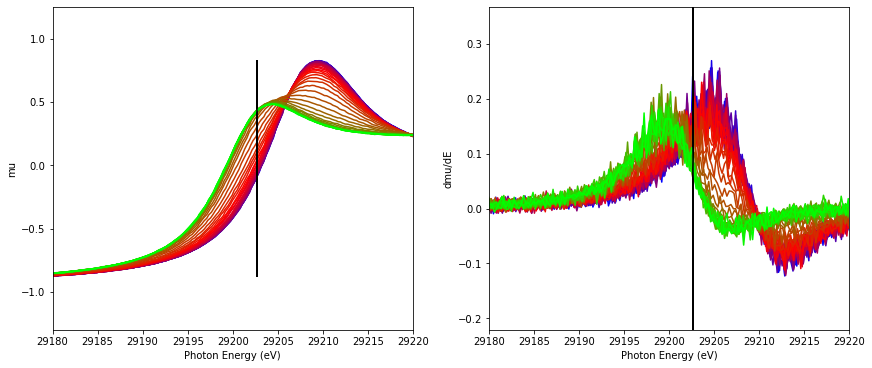

In [17]:
Samp_E0 = 29200
energy_range = 20
use_mean = True

my_exp.find_sample_e0(Samp_E0, energy_range = energy_range, use_mean = use_mean)

## Step 8. Save Experiment with 'pickle'

    Pickle - A method to save the experimental class and reopen it elsewhere.

In [18]:
pickle_path = os.path.join(pickle_dir,pickle_name)

pickle_out = open(pickle_path,"wb")
pickle.dump(my_exp, pickle_out)
pickle_out.close()